<a href="https://colab.research.google.com/github/ThanakornMix/G1-Consulting-Data-Science/blob/main/Citation_Counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [4]:
#Data Loading

articles = pd.read_csv('/content/drive/MyDrive/Group 1/articles.CDKN2A.csv')
authors = pd.read_csv('/content/drive/MyDrive/Group 1/authors.CDKN2A.csv')
paper_counts = pd.read_csv('/content/drive/MyDrive/Group 1/paper_counts.csv')

### Data Cleaning

In [5]:
# Data Cleaning: Handle Missing Values and Remove Duplicates
# Handle missing values in `authors_df`
authors['AuthorForename'].fillna('Unknown', inplace=True)
authors['AuthorInitials'].fillna('Unknown', inplace=True)
authors.dropna(subset=['AuthorLastname'], inplace=True)

<ipython-input-5-dcf0bb612f25>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  authors['AuthorForename'].fillna('Unknown', inplace=True)
<ipython-input-5-dcf0bb612f25>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [6]:
# Handle missing values in `articles_df`
articles.fillna({
    'Location': 'Unknown',
    'FirstAuthorForename': 'Unknown',
    'FirstAuthorLastname': 'Unknown',
    'FirstAuthorInitials': 'Unknown',
    'FirstAuthorAffiliation': 'Unknown'
}, inplace=True)

In [7]:
# Remove duplicates
articles.drop_duplicates(inplace=True)
authors.drop_duplicates(inplace=True)
paper_counts.drop_duplicates(inplace=True)

In [8]:
# Data Manipulation: Merge and Create Unique Identifiers
# Merge `authors_df` and `articles_df` on `PMID`
merged_df = pd.merge(authors, articles, on='PMID', how='inner')

In [9]:
# Create a unique identifier for researchers
merged_df['ResearcherID'] = merged_df['AuthorLastname'] + '_' + merged_df['AuthorInitials']
merged_df.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID
0,10551774,1,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Frost_SJ
1,10551774,2,D J,Simpson,DJ,NaN,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Simpson_DJ
2,10551774,3,R N,Clayton,RN,NaN,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Clayton_RN
3,10551774,4,W E,Farrell,WE,NaN,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Farrell_WE
4,10595918,1,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...,Malignant transformation of neurofibromas in n...,Patients with neurofibromatosis 1 (NF1) are pr...,0002-9440,The American journal of pathology,(155) 1879-84,1999,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...,Nielsen_GP


### Top Authors

In [10]:
# Count the number of papers each researcher has been involved in
author_counts = merged_df['ResearcherID'].value_counts().reset_index()
author_counts.columns = ['ResearcherID', 'Count']
# Sort into descending order
author_counts = author_counts.sort_values(by='Count', ascending=False)
most_published_authors = author_counts.head(20)
most_published_authors = pd.DataFrame(most_published_authors)

# Display the dataframe
display(most_published_authors)
top_10_authors = most_published_authors['ResearcherID'].tolist()

,ResearcherID,Count
0,Goldstein_AM,62
1,Wang_Y,58
2,Tucker_MA,49
3,Zhang_Y,45
4,Hayward_NK,44
5,Wang_J,41
6,Ghiorzo_P,39
7,Liu_Y,38
8,Li_J,37
9,Li_Y,36


In [11]:
# filter merged_df by top researchers
filtered_df = merged_df[merged_df['ResearcherID'].isin(top_10_authors)]
filtered_df.head()
filtered_df = filtered_df.assign(DOI = None)
filtered_df.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID,DOI
12,10620111,3,M,Harland,M,NaN,Genotype/phenotype and penetrance studies in m...,Patients with a family history of melanoma are...,0022-202X,The Journal of investigative dermatology,(114) 28-33,2000,J A,Bishop,JA,"ICRF Genetic Epidemiology Laboratory, Leeds, U...",Harland_M,None
18,10620111,9,D T,Bishop,DT,NaN,Genotype/phenotype and penetrance studies in m...,Patients with a family history of melanoma are...,0022-202X,The Journal of investigative dermatology,(114) 28-33,2000,J A,Bishop,JA,"ICRF Genetic Epidemiology Laboratory, Leeds, U...",Bishop_DT,None
107,10732752,2,B,Bressac-de Paillerets,B,NaN,Individuals with presumably hereditary uveal m...,In familial cutaneous malignant melanoma (CMM)...,0007-0920,British journal of cancer,(82) 818-22,2000,N,Soufir,N,"Unité des Marqueurs Génétiques des Cancers, In...",Bressac-de Paillerets_B,None
121,10738302,1,M,Harland,M,"ICRF Genetic Epidemiology Laboratory, St. Jame...",Mutation screening of the CDKN2A promoter in m...,"Germline mutations of CDKN2A, at 9p21, are res...",1045-2257,"Genes, chromosomes & cancer",(28) 45-57,2000,M,Harland,M,"ICRF Genetic Epidemiology Laboratory, St. Jame...",Harland_M,None
123,10738302,3,P,Ghiorzo,P,NaN,Mutation screening of the CDKN2A promoter in m...,"Germline mutations of CDKN2A, at 9p21, are res...",1045-2257,"Genes, chromosomes & cancer",(28) 45-57,2000,M,Harland,M,"ICRF Genetic Epidemiology Laboratory, St. Jame...",Ghiorzo_P,None


###DOI and Citation Counts

In [12]:
!pip install habanero

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0


In [14]:
from habanero import Crossref
cr = Crossref()

# Loop through the filtered_df DataFrame
for index, row in filtered_df.iterrows():
    # Use title in search
    title = row['Title']

    # Check if DOI already exists
    if pd.notna(row['DOI']):
      # Skip row if DOI already exists
      continue

    result = cr.works(query=title)

    # Check if a DOI is found
    if 'items' in result['message'] and len(result['message']['items']) > 0:
        doi = result['message']['items'][0].get('DOI')
        if doi:
            # Update the DOI in the DataFrame immediately
            filtered_df.at[index, 'DOI'] = doi
            print(f"{title}: {doi}")
        else:
          # If no DOI fill with None
            filtered_df.at[index, 'DOI'] = None
    else:
      # If no DOI fill with None
        filtered_df.at[index, 'DOI'] = None

A systematic review of the prevalence of germline pathogenic variants in patients with pancreatic cancer.: 10.1007/s00535-021-01806-y
SRSF5 regulates alternative splicing of : 10.7717/peerj.16103/fig-4
Integrated genotype-phenotype analysis of long-term epilepsy-associated ganglioglioma.: 10.1111/bpa.13011
Integrated genotype-phenotype analysis of long-term epilepsy-associated ganglioglioma.: 10.1111/bpa.13011
A proteogenomic portrait of lung squamous cell carcinoma.: 10.26226/morressier.5b4709886f4cb30010951f2c
A proteogenomic portrait of lung squamous cell carcinoma.: 10.26226/morressier.5b4709886f4cb30010951f2c
CDKN2A is a prognostic biomarker and correlated with immune infiltrates in hepatocellular carcinoma.: 10.1042/bsr-2021-1103_cor
Screening and identification of NOTCH1, CDKN2A, and NOS3 as differentially expressed autophagy-related genes in erectile dysfunction.: 10.7287/peerj.11986v0.1/reviews/2
Comprehensive molecular characterization of pediatric radiation-induced high-grad

In [15]:
# check DOI is now in dataset
filtered_df.head()

#save filtered_df
#filtered_df.to_csv('/content/drive/MyDrive/Group 1/filtered_df.csv', index=False)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID,DOI
12,10620111,3,M,Harland,M,NaN,Genotype/phenotype and penetrance studies in m...,Patients with a family history of melanoma are...,0022-202X,The Journal of investigative dermatology,(114) 28-33,2000,J A,Bishop,JA,"ICRF Genetic Epidemiology Laboratory, Leeds, U...",Harland_M,10.1046/j.1523-1747.2000.00823.x
18,10620111,9,D T,Bishop,DT,NaN,Genotype/phenotype and penetrance studies in m...,Patients with a family history of melanoma are...,0022-202X,The Journal of investigative dermatology,(114) 28-33,2000,J A,Bishop,JA,"ICRF Genetic Epidemiology Laboratory, Leeds, U...",Bishop_DT,10.1046/j.1523-1747.2000.00823.x
107,10732752,2,B,Bressac-de Paillerets,B,NaN,Individuals with presumably hereditary uveal m...,In familial cutaneous malignant melanoma (CMM)...,0007-0920,British journal of cancer,(82) 818-22,2000,N,Soufir,N,"Unité des Marqueurs Génétiques des Cancers, In...",Bressac-de Paillerets_B,10.1054/bjoc.1999.1005
121,10738302,1,M,Harland,M,"ICRF Genetic Epidemiology Laboratory, St. Jame...",Mutation screening of the CDKN2A promoter in m...,"Germline mutations of CDKN2A, at 9p21, are res...",1045-2257,"Genes, chromosomes & cancer",(28) 45-57,2000,M,Harland,M,"ICRF Genetic Epidemiology Laboratory, St. Jame...",Harland_M,10.1002/(sici)1098-2264(200005)28:1<45::aid-gc...
123,10738302,3,P,Ghiorzo,P,NaN,Mutation screening of the CDKN2A promoter in m...,"Germline mutations of CDKN2A, at 9p21, are res...",1045-2257,"Genes, chromosomes & cancer",(28) 45-57,2000,M,Harland,M,"ICRF Genetic Epidemiology Laboratory, St. Jame...",Ghiorzo_P,10.1002/(sici)1098-2264(200005)28:1<45::aid-gc...


In [16]:
# import requests which allows HTTP requests
import requests

# create function to gather citation count
def get_citation_count(doi):
  # API UrL for the doi provided in the dataset
  url = f"https://api.crossref.org/works/{doi}"
  # Make a request to CrossRef API
  response = requests.get(url)

  # Get citation count from JSON
  if response.status_code == 200:
      data = response.json()
      citation_count = data['message'].get('is-referenced-by-count', 0)
      # print DOI and citation count
      print(f"Citation count for DOI {doi}: {citation_count}")
      return citation_count
  else:
      # print an error message if request did not work
      print(f"Error fetching data for DOI {doi}")
      return None

# Loop through the dataframe and use citation counts function for each paper
filtered_df['Citation Count'] = filtered_df['DOI'].apply(get_citation_count)


Citation count for DOI 10.1046/j.1523-1747.2000.00823.x: 88
Citation count for DOI 10.1046/j.1523-1747.2000.00823.x: 88
Citation count for DOI 10.1054/bjoc.1999.1005: 32
Citation count for DOI 10.1002/(sici)1098-2264(200005)28:1<45::aid-gcc6>3.3.co;2-6: 1
Citation count for DOI 10.1002/(sici)1098-2264(200005)28:1<45::aid-gcc6>3.3.co;2-6: 1
Citation count for DOI 10.1002/(sici)1098-2264(200005)28:1<45::aid-gcc6>3.3.co;2-6: 1
Citation count for DOI 10.1002/(sici)1098-2264(200005)28:1<45::aid-gcc6>3.3.co;2-6: 1
Citation count for DOI 10.1002/(sici)1098-2264(200005)28:1<45::aid-gcc6>3.3.co;2-6: 1
Citation count for DOI 10.1002/(sici)1098-2264(200005)28:1<45::aid-gcc6>3.3.co;2-6: 1
Citation count for DOI 10.1038/sj.onc.1203507: 16
Citation count for DOI 10.1038/sj.onc.1203507: 16
Citation count for DOI 10.1093/jnci/92.12.1006: 144
Citation count for DOI 10.1093/jnci/92.12.1006: 144
Citation count for DOI 10.1007/978-3-319-46029-1_39-1: 0
Citation count for DOI 10.1086/303001: 64
Citation co

In [18]:
# sort papers by citation count
top_papers = filtered_df.sort_values(by='Citation Count', ascending=False)
# drop duplicates so only first author
unique_top_papers = top_papers.drop_duplicates(subset='Title').head(10)
unique_top_papers

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID,DOI,Citation Count
10822,22751097,41,Yun,Li,Y,NaN,Genome-wide association study in Han Chinese i...,We performed a meta-analysis of 2 genome-wide ...,1546-1718,Nature genetics,(44) 890-4,2012,Xiangfeng,Lu,X,State Key Laboratory of Cardiovascular Disease...,Li_Y,10.1038/ng.782,580
9128,21642991,6,Lu,Wang,L,NaN,The nuclear deubiquitinase BAP1 is commonly in...,Malignant pleural mesotheliomas (MPMs) often s...,1546-1718,Nature genetics,(43) 668-72,2011,Matthew,Bott,M,"Department of Pathology, Memorial Sloan-Ketter...",Wang_L,10.1038/ng.855,579
10023,22226782,7,Ralph H,Hruban,RH,NaN,Presence of somatic mutations in most early-st...,More information is needed about genetic facto...,1528-0012,Gastroenterology,(142) 730-733.e9,2012,Mitsuro,Kanda,M,"Department of Pathology, The Sol Goldman Pancr...",Hruban_RH,10.1053/j.gastro.2011.12.042,534
10070,22251937,17,Ralph H,Hruban,RH,NaN,Small cell and large cell neuroendocrine carci...,Poorly differentiated neuroendocrine carcinoma...,1532-0979,The American journal of surgical pathology,(36) 173-84,2012,Shinichi,Yachida,S,"Departments of Pathology, The Sol Goldman Panc...",Hruban_RH,10.1097/pas.0b013e3182417d36,449
1024,12072543,8,Paola,Ghiorzo,P,NaN,Geographical variation in the penetrance of CD...,"Germline mutations in the CDKN2A gene, which e...",0027-8874,Journal of the National Cancer Institute,(94) 894-903,2002,D Timothy,Bishop,DT,"Genetic Epidemiology Division, Cancer Research...",Ghiorzo_P,10.1093/jnci/94.12.894,399
380,11008905,1,A M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Gene-covariate interaction between dysplastic ...,The CDKN2A gene has been implicated in cutaneo...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(9) 889-94,2000,A M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Goldstein_AM,10.7326/0003-4819-102-4-458,353
3181,16905682,3,Mark,Harland,M,NaN,Features associated with germline CDKN2A mutat...,The major factors individually reported to be ...,1468-6244,Journal of medical genetics,(44) 99-106,2007,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Harland_M,10.1136/jmg.2006.043802,328
3321,17047042,3,Mark,Harland,M,NaN,High-risk melanoma susceptibility genes and pa...,"GenoMEL, comprising major familial melanoma re...",0008-5472,Cancer research,(66) 9818-28,2006,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Harland_M,10.1158/0008-5472.can-06-0494,325
17596,26551670,1,Linghua,Wang,L,"Human Genome Sequencing Center, Baylor College...",Genomic profiling of Sézary syndrome identifie...,Sézary syndrome is a rare leukemic form of cut...,1546-1718,Nature genetics,(47) 1426-34,2015,Linghua,Wang,L,"Human Genome Sequencing Center, Baylor College...",Wang_L,10.1038/ng.3444,270
9064,21619050,1,Junan,Li,J,"Division of Environmental Health Sciences, Col...",Regulatory mechanisms of tumor suppressor P16(...,"P16(INK4A) (also known as P16 and MTS1), a pro...",1520-4995,Biochemistry,(50) 5566-82,2011,Junan,Li,J,"Division of Environmental Health Sciences, Col...",Li_J,10.1021/bi200642e,249


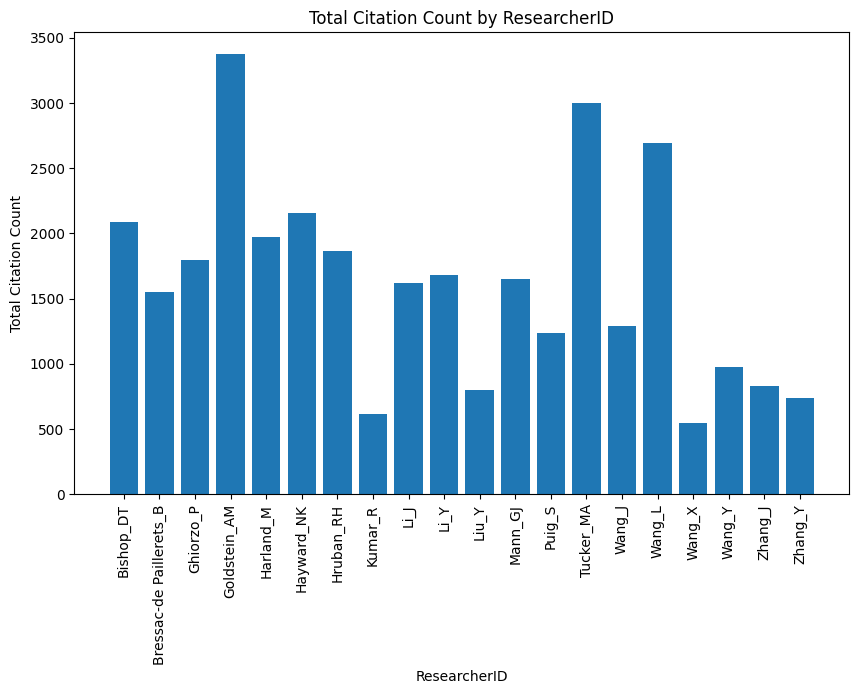

In [19]:
# group top cited papers by author and sum citation count for each author
author_citation_counts = top_papers.groupby('ResearcherID')['Citation Count'].sum()
author_citation_counts.reset_index()
author_citation_counts

#plot a bar chart of top cited authors
plt.figure(figsize=(10, 6))
plt.bar(author_citation_counts.index, author_citation_counts.values)
plt.xlabel('ResearcherID')
plt.ylabel('Total Citation Count')
plt.title('Total Citation Count by ResearcherID')
plt.xticks(rotation=90)
plt.show()

## Identified Goldstein_AM, Tucker_MA and Hayward_NK as top 3 recommended researchers

### Analysis of their top 5 most cited papers

In [20]:
# Goldstein_AM top cited papers
goldstein_papers = filtered_df[filtered_df['ResearcherID'] == 'Goldstein_AM']
goldstein_papers = goldstein_papers.sort_values(by='Citation Count', ascending=False)
goldstein_papers.head(5)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID,DOI,Citation Count
1019,12072543,3,Alisa M,Goldstein,AM,NaN,Geographical variation in the penetrance of CD...,"Germline mutations in the CDKN2A gene, which e...",0027-8874,Journal of the National Cancer Institute,(94) 894-903,2002,D Timothy,Bishop,DT,"Genetic Epidemiology Division, Cancer Research...",Goldstein_AM,10.1093/jnci/94.12.894,399
380,11008905,1,A M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Gene-covariate interaction between dysplastic ...,The CDKN2A gene has been implicated in cutaneo...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(9) 889-94,2000,A M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Goldstein_AM,10.7326/0003-4819-102-4-458,353
3179,16905682,1,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Features associated with germline CDKN2A mutat...,The major factors individually reported to be ...,1468-6244,Journal of medical genetics,(44) 99-106,2007,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Goldstein_AM,10.1136/jmg.2006.043802,328
3319,17047042,1,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",High-risk melanoma susceptibility genes and pa...,"GenoMEL, comprising major familial melanoma re...",0008-5472,Cancer research,(66) 9818-28,2006,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Goldstein_AM,10.1158/0008-5472.can-06-0494,325
1413,12789279,2,Alisa M,Goldstein,AM,NaN,Melanoma etiology: where are we?,"Melanoma incidence rates are rising rapidly, p...",0950-9232,Oncogene,(22) 3042-52,2003,Margaret A,Tucker,MA,"Genetic Epidemiology Branch, DCEG, NCI, Execut...",Goldstein_AM,10.1038/sj.onc.1206444,194


In [23]:
#Tucker_MA top cited papers
tucker_papers = filtered_df[filtered_df['ResearcherID'] == 'Tucker_MA']
tucker_papers = tucker_papers.sort_values(by='Citation Count', ascending=False)
tucker_papers.head(5)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID,DOI,Citation Count
1034,12072543,18,Margaret A,Tucker,MA,NaN,Geographical variation in the penetrance of CD...,"Germline mutations in the CDKN2A gene, which e...",0027-8874,Journal of the National Cancer Institute,(94) 894-903,2002,D Timothy,Bishop,DT,"Genetic Epidemiology Division, Cancer Research...",Tucker_MA,10.1093/jnci/94.12.894,399
382,11008905,3,M A,Tucker,MA,NaN,Gene-covariate interaction between dysplastic ...,The CDKN2A gene has been implicated in cutaneo...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(9) 889-94,2000,A M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Tucker_MA,10.7326/0003-4819-102-4-458,353
3215,16905682,37,Margaret A,Tucker,MA,NaN,Features associated with germline CDKN2A mutat...,The major factors individually reported to be ...,1468-6244,Journal of medical genetics,(44) 99-106,2007,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Tucker_MA,10.1136/jmg.2006.043802,328
3355,17047042,37,Margaret A,Tucker,MA,NaN,High-risk melanoma susceptibility genes and pa...,"GenoMEL, comprising major familial melanoma re...",0008-5472,Cancer research,(66) 9818-28,2006,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Tucker_MA,10.1158/0008-5472.can-06-0494,325
1412,12789279,1,Margaret A,Tucker,MA,"Genetic Epidemiology Branch, DCEG, NCI, Execut...",Melanoma etiology: where are we?,"Melanoma incidence rates are rising rapidly, p...",0950-9232,Oncogene,(22) 3042-52,2003,Margaret A,Tucker,MA,"Genetic Epidemiology Branch, DCEG, NCI, Execut...",Tucker_MA,10.1038/sj.onc.1206444,194


In [24]:
# Hayward_NK top cited papers
hayward_papers = filtered_df[filtered_df['ResearcherID'] == 'Hayward_NK']
hayward_papers = hayward_papers.sort_values(by='Citation Count', ascending=False)
hayward_papers.head(5)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID,DOI,Citation Count
3182,16905682,4,Nicholas K,Hayward,NK,NaN,Features associated with germline CDKN2A mutat...,The major factors individually reported to be ...,1468-6244,Journal of medical genetics,(44) 99-106,2007,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Hayward_NK,10.1136/jmg.2006.043802,328
3323,17047042,5,Nicholas K,Hayward,NK,NaN,High-risk melanoma susceptibility genes and pa...,"GenoMEL, comprising major familial melanoma re...",0008-5472,Cancer research,(66) 9818-28,2006,Alisa M,Goldstein,AM,"Genetic Epidemiology Branch, Division of Cance...",Hayward_NK,10.1158/0008-5472.can-06-0494,325
694,11500805,7,N K,Hayward,NK,NaN,MC1R genotype modifies risk of melanoma in fam...,Mutations in the exons of the cyclin-dependent...,0002-9297,American journal of human genetics,(69) 765-73,2001,N F,Box,NF,"Centre for Functional and Applied Genomics, In...",Hayward_NK,10.1086/323412,244
17048,26251183,14,Nicholas K,Hayward,NK,"QIMR Berghofer Medical Research Institute, 300...",POLE mutations in families predisposed to cuta...,Germline mutations in the exonuclease domain o...,1573-7292,Familial cancer,(14) 621-8,2015,Lauren G,Aoude,LG,"QIMR Berghofer Medical Research Institute, 300...",Hayward_NK,10.1001/jama.1987.03400210088032,205
5134,18519675,8,Nicholas K,Hayward,NK,NaN,Genome-wide copy number analysis in esophageal...,We applied whole-genome single-nucleotide poly...,1538-7445,Cancer research,(68) 4163-72,2008,Derek J,Nancarrow,DJ,"Oncogenomics, Queensland Institute of Medical ...",Hayward_NK,10.1158/0008-5472.can-06-4152,187
